In [2]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Add,Flatten,Reshape
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tqdm import tqdm

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
testPath = '/content/drive/My Drive/D1/test/'
trainPath = '/content/drive/My Drive/D1/training/'

Creating GroundTruths 


In [0]:
import cv2 

for i in range(1,21):
    FILE_NAME = testPath +'images/'+ str(i)+'_test.tif'
    img = cv2.imread(FILE_NAME)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(testPath +'groundTruth/'+str(i)+'_test.tif', gray) 

Loading data and creating train set, validation set and test set.

In [5]:
train_image = []
for i in tqdm(range(21,41)):
    img = image.load_img(trainPath+'images/'+str(i)+'_training.tif', target_size=(224,224,3) , grayscale=False)
    img= image.img_to_array(img)
    img = img/255
    train_image.append(img)
X_train = np.array(train_image)

100%|██████████| 20/20 [00:05<00:00,  3.94it/s]


In [6]:
GT_train_image = []
for i in tqdm(range(21,41)):
    img = image.load_img(trainPath+'groundTruth/'+str(i)+'_training.tif', target_size=(224,224,3) , grayscale=False)
    img= image.img_to_array(img)
    img = img/255
    GT_train_image.append(img)
X_train_GT = np.array(GT_train_image)

100%|██████████| 20/20 [00:06<00:00,  3.28it/s]


In [7]:
test_image = []
for i in tqdm(range(1,21)):
    img = image.load_img(testPath+'images/'+str(i)+'_test.tif', target_size=(224,224,3) , grayscale=False)
    img= image.img_to_array(img)
    img = img/255
    test_image.append(img)
X = np.array(test_image)

100%|██████████| 20/20 [00:06<00:00,  3.70it/s]


In [8]:
GT_test_image = []
for i in tqdm(range(1,21)):
    img = image.load_img(testPath+'groundTruth/'+str(i)+'_test.tif', target_size=(224,224,3) , grayscale=False)
    img= image.img_to_array(img)
    img = img/255
    GT_test_image.append(img)
X_GT = np.array(GT_test_image)

100%|██████████| 20/20 [00:05<00:00,  3.45it/s]


In [0]:
X_valid=X[:10]
X_test=X[10:20]
X_GT_valid=X_GT[:10]
X_GT_test=X_GT[10:20]


Defining and Trainning model

In [0]:
input1 = Input(shape=(224,224,3))

x = Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same')(input1)
x = Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same')(x)
out = Conv2D(3, kernel_size=(3, 3), activation='sigmoid',padding='same')(x)
model = Model(inputs=input1, outputs=out)

In [13]:
model.compile(optimizer='adam', loss='mse')

W0811 20:15:13.504961 140652601173888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 3)       1731      
Total params: 40,451
Trainable params: 40,451
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,X_train_GT,
                epochs=100,
                batch_size=10,
                shuffle=True,
                validation_data=(X_valid,X_GT_valid)
                )

W0811 20:17:38.881507 140652601173888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0811 20:17:38.977555 140652601173888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 20 samples, validate on 10 samples
Epoch 1/100
20/20 [==============================] - 8s 390ms/step - loss: 0.0801 - val_loss: 0.0749
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0788 - val_loss: 0.0737
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0772 - val_loss: 0.0722
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0754 - val_loss: 0.0705
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0729 - val_loss: 0.0669
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0690 - val_loss: 0.0622
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0638 - val_loss: 0.0559
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0569 - val_loss: 0.0485
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0483 - val_loss: 0.0392
Epoch 10/100
20/20 [==============================] - 0s 7ms/st

In [0]:
model.save('/content/drive/My Drive/D1/model.h5')

Testing Model

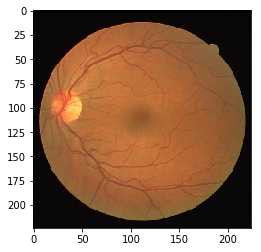

In [20]:
img1=X_valid[0]
plt.imshow(img1)

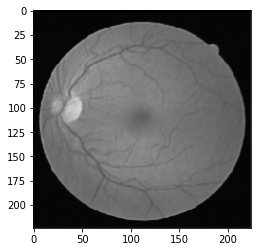

In [19]:
out_img=model.predict(X_valid)
plt.imshow(out_img[0])